# SMU-MSDS-7333-Quantifying the World

## Case Study 4- Financial Bankruptcy Classification

### By Rashmi Patel

# Introduction

In this case study, we will build a classifier using random forest and XGBoost that will predict that business will go in bankruptcy or not. We will perform analysis by dividing this case study into 6 parts:

* Business Understanding

* Data Evaluation / Engineering

* Modeling Preparations

* Model Building & Evaluation

* Model Interpretability & Explainability

* Case Conclusions

# Business Understanding

In [1]:
#importing libraries and reading in file
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint as sp_randint

#general sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Files
import os
from scipy.io import arff

# Data Evaluation/Engineering


The dataset provided contains 5 files named: 
* 1year.arff having 7027 financial statements
* 2year.arff having 10173 financial statements
* 3year.arff having 10503 financial statements
* 4year.arff having 9792 financial statements
* 5year.arff having 5910 financial statements

All the files contains 65 attributes(columns) which includes target attribute named 'class', together counting up for 43405 financial statements.


### Evaluating the dataset

In [2]:
os.listdir()

['.DS_Store',
 '~$DS7333_CaseStudy_4_RPatel.pptx',
 '.ipynb_checkpoints',
 'RP_7333_CaseStudy4.ipynb',
 'DS7333_CaseStudy_4_RPatel.pptx',
 'data',
 'heatmap.png']

In [3]:
root = '/Users/arth/Desktop/RP-MSDS/Spring2022/QTW/CaseStudy4'
for item in os.listdir(root):
    if not item.startswith('.') and os.path.isfile(os.path.join(root, item)):
        print(item)

~$DS7333_CaseStudy_4_RPatel.pptx
RP_7333_CaseStudy4.ipynb
DS7333_CaseStudy_4_RPatel.pptx
heatmap.png


In [6]:
data_folder = '/Users/arth/Desktop/RP-MSDS/Spring2022/QTW/CaseStudy4/data'
for item in os.listdir(data_folder):
    if not item.startswith('.') and os.path.isfile(os.path.join(data_folder, item)):
        print(item)

2year.arff
3year.arff
5year.arff
4year.arff
1year.arff


In [7]:
files = ['data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff']


df = pd.DataFrame(arff.loadarff(files[0])[0])

for f in files[1:]:
    data_temp = arff.loadarff(f)
    df_temp = pd.DataFrame(data_temp[0])
    print(df_temp.shape)
    df = df.merge(df_temp,how='outer') 

(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [8]:
df.shape

(43405, 65)

In [9]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


* Looking at the information regarding the dataset after merging and converting it into single dataframe, it seems all the variables are in numeric(float) format.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [11]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,1.088350e+03,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,4.993325e+03,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,6.123700e+06,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000


In [12]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

### Evaluating Target Variable

In [13]:
df['class'].unique()

array([b'0', b'1'], dtype=object)

In [14]:
df["class"].value_counts()

b'0'    41314
b'1'     2091
Name: class, dtype: int64

In [15]:
df['class'] = df['class'].replace([b'0', b'1'], [0, 1])

df['class'].value_counts()


0    41314
1     2091
Name: class, dtype: int64

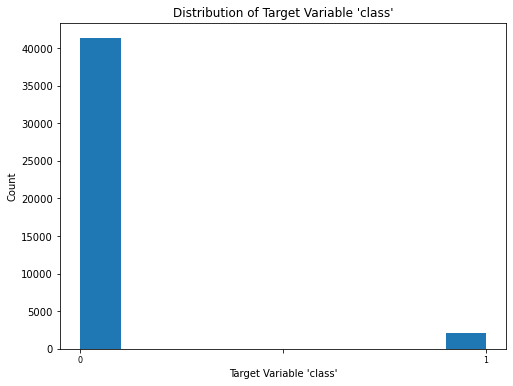

In [16]:
plt.figure(figsize=(8,6))
xtick = [0, 0.5, 1]
xtick_labels = ['0' , '', '1']
plt.xticks(xtick, xtick_labels, fontsize=8)
plt.hist(df['class'])
plt.title("Distribution of Target Variable 'class'")
plt.xlabel("Target Variable 'class'")
plt.ylabel("Count")
plt.show()

array([[<AxesSubplot:title={'center':'Attr1'}>,
        <AxesSubplot:title={'center':'Attr2'}>,
        <AxesSubplot:title={'center':'Attr3'}>,
        <AxesSubplot:title={'center':'Attr4'}>,
        <AxesSubplot:title={'center':'Attr5'}>,
        <AxesSubplot:title={'center':'Attr6'}>,
        <AxesSubplot:title={'center':'Attr7'}>,
        <AxesSubplot:title={'center':'Attr8'}>],
       [<AxesSubplot:title={'center':'Attr9'}>,
        <AxesSubplot:title={'center':'Attr10'}>,
        <AxesSubplot:title={'center':'Attr11'}>,
        <AxesSubplot:title={'center':'Attr12'}>,
        <AxesSubplot:title={'center':'Attr13'}>,
        <AxesSubplot:title={'center':'Attr14'}>,
        <AxesSubplot:title={'center':'Attr15'}>,
        <AxesSubplot:title={'center':'Attr16'}>],
       [<AxesSubplot:title={'center':'Attr17'}>,
        <AxesSubplot:title={'center':'Attr18'}>,
        <AxesSubplot:title={'center':'Attr19'}>,
        <AxesSubplot:title={'center':'Attr20'}>,
        <AxesSubplot:title=

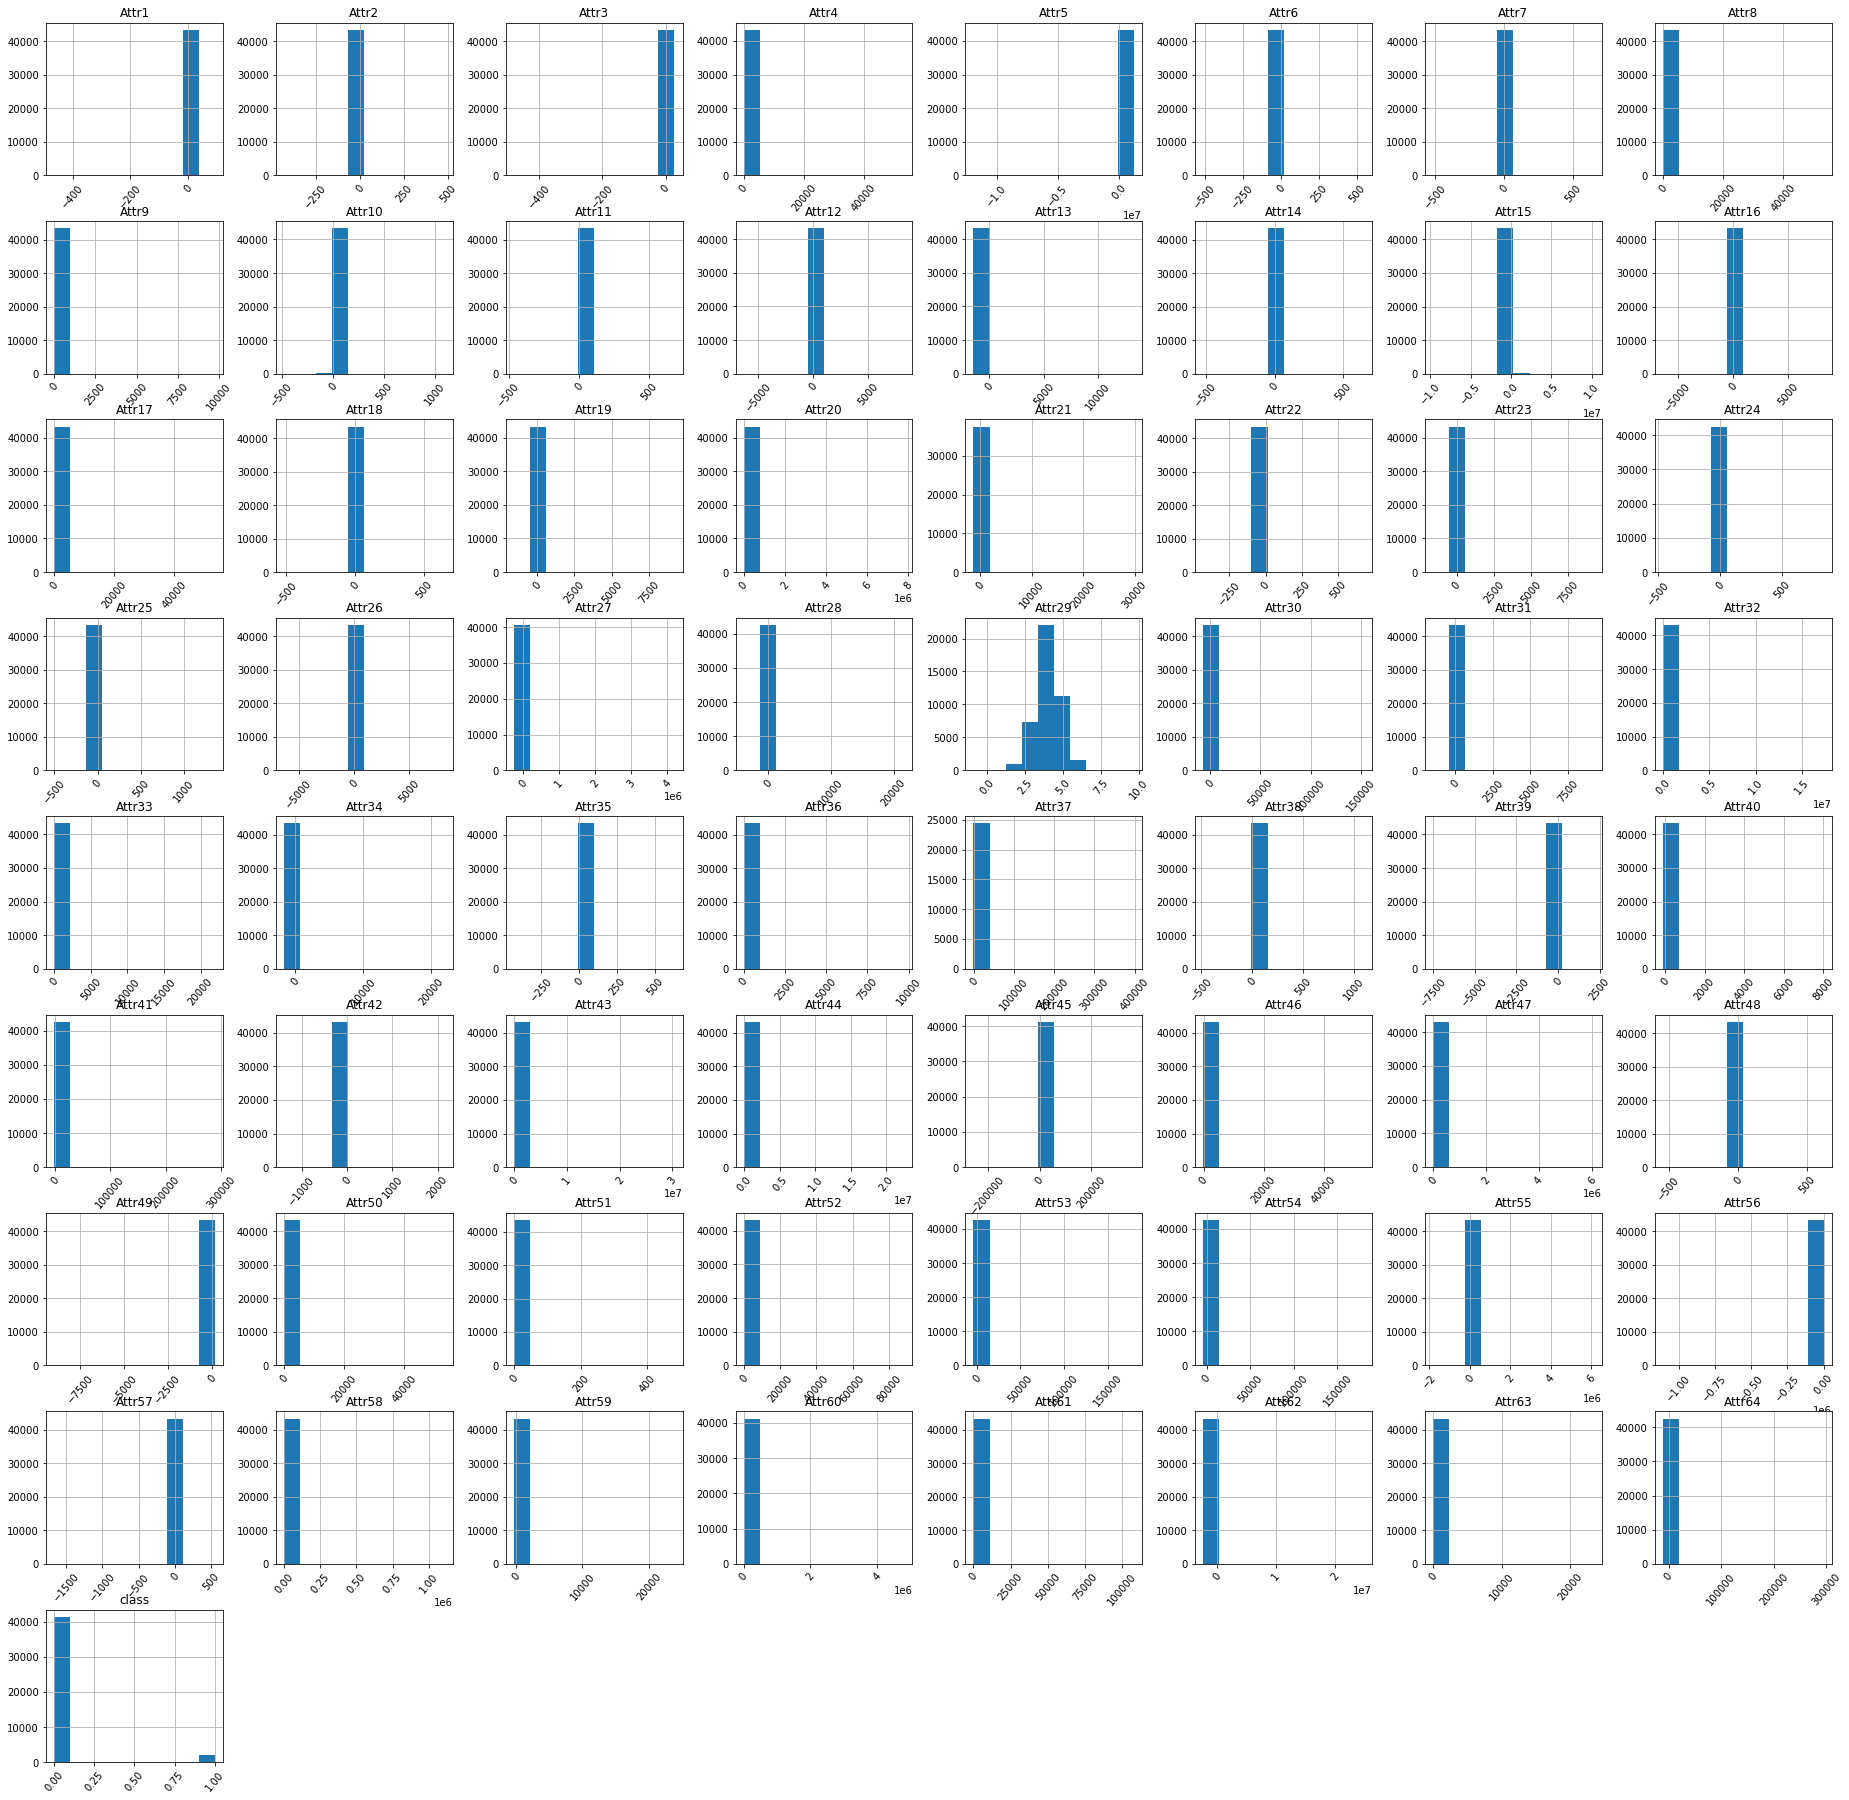

In [17]:
# Since there are 13 numeric variables, we will create a space od 14 by 14 to show histograms of those variables.
df.hist(figsize=(32,32), xrot=50)

### Handling missing values

Looking at the table and graph created for calculating the missing values in the dataset reveals that Attr21 and Attr37 has highest percentage of missing values with 13.49% and 43.74% respectively. These 2 variables(columns) will be dropped from the dataframe.

We will be imputing the dataset after splitting the dataset into Train and Test sets.

In [18]:
Missing_Data= pd.DataFrame()
for col in df.columns:
    Missing_Data=Missing_Data.append({"Column Name": col,
                                      "Missing Count":df[col].isnull().sum(),
                                      "Missing%":df[col].isnull().sum()/len(df)*100 },
                                     ignore_index=True)   
Missing_Data['Missing%'] = Missing_Data['Missing%'].round(decimals = 2)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(Missing_Data[Missing_Data["Missing%"] >0])

   Column Name  Missing Count  Missing%
0        Attr1            8.0      0.02
1        Attr2            8.0      0.02
2        Attr3            8.0      0.02
3        Attr4          134.0      0.31
4        Attr5           89.0      0.21
5        Attr6            8.0      0.02
6        Attr7            8.0      0.02
7        Attr8           94.0      0.22
8        Attr9            9.0      0.02
9       Attr10            8.0      0.02
10      Attr11           44.0      0.10
11      Attr12          134.0      0.31
12      Attr13          127.0      0.29
13      Attr14            8.0      0.02
14      Attr15           36.0      0.08
15      Attr16           95.0      0.22
16      Attr17           94.0      0.22
17      Attr18            8.0      0.02
18      Attr19          128.0      0.29
19      Attr20          127.0      0.29
20      Attr21         5854.0     13.49
21      Attr22            8.0      0.02
22      Attr23          127.0      0.29
23      Attr24          922.0      2.12


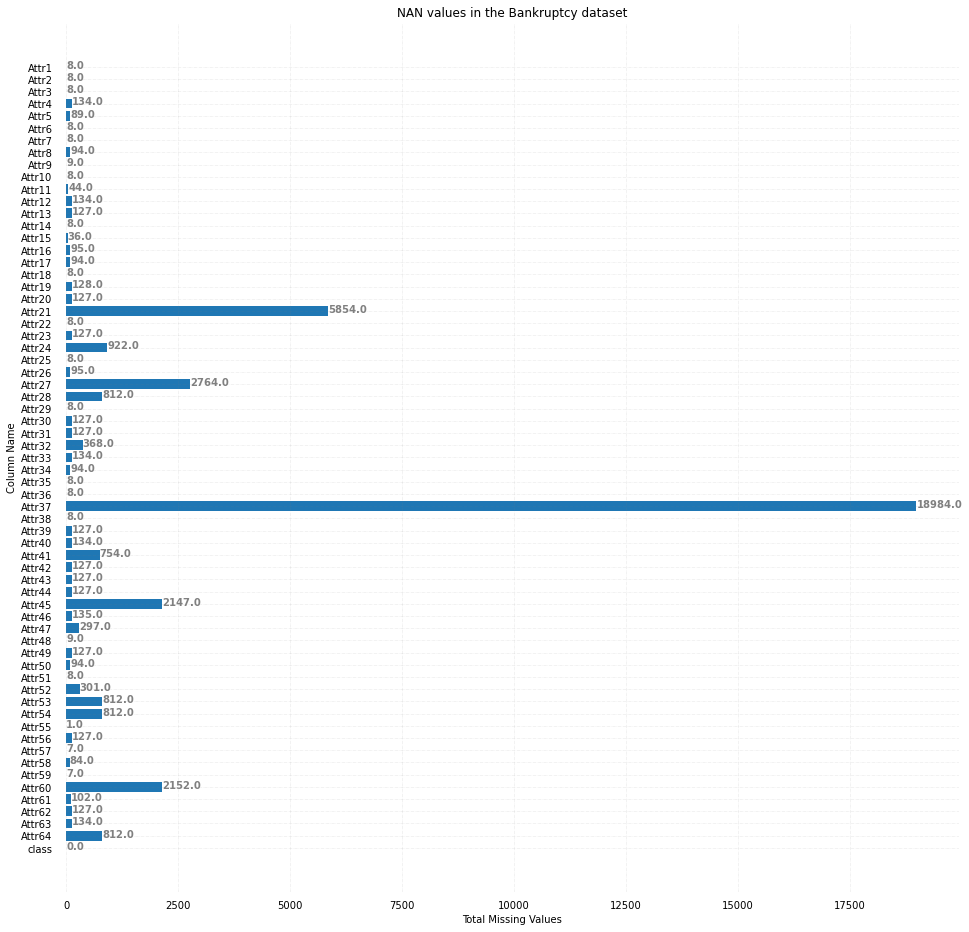

In [19]:

# Figure Size
fig, ax = plt.subplots(figsize =(16, 16))

# Horizontal Bar Plot
ax.barh(Missing_Data['Column Name'], Missing_Data['Missing Count'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',color ='grey')

# Add Plot Title
ax.set_title('NAN values in the Bankruptcy dataset' )
ax.set_xlabel('Total Missing Values')
ax.set_ylabel('Column Name')
# Show Plot
plt.show()


In [20]:
df= df.drop(["Attr21"], axis = 1)
df= df.drop(["Attr37"], axis = 1)

### Correlation between variables

<AxesSubplot:>

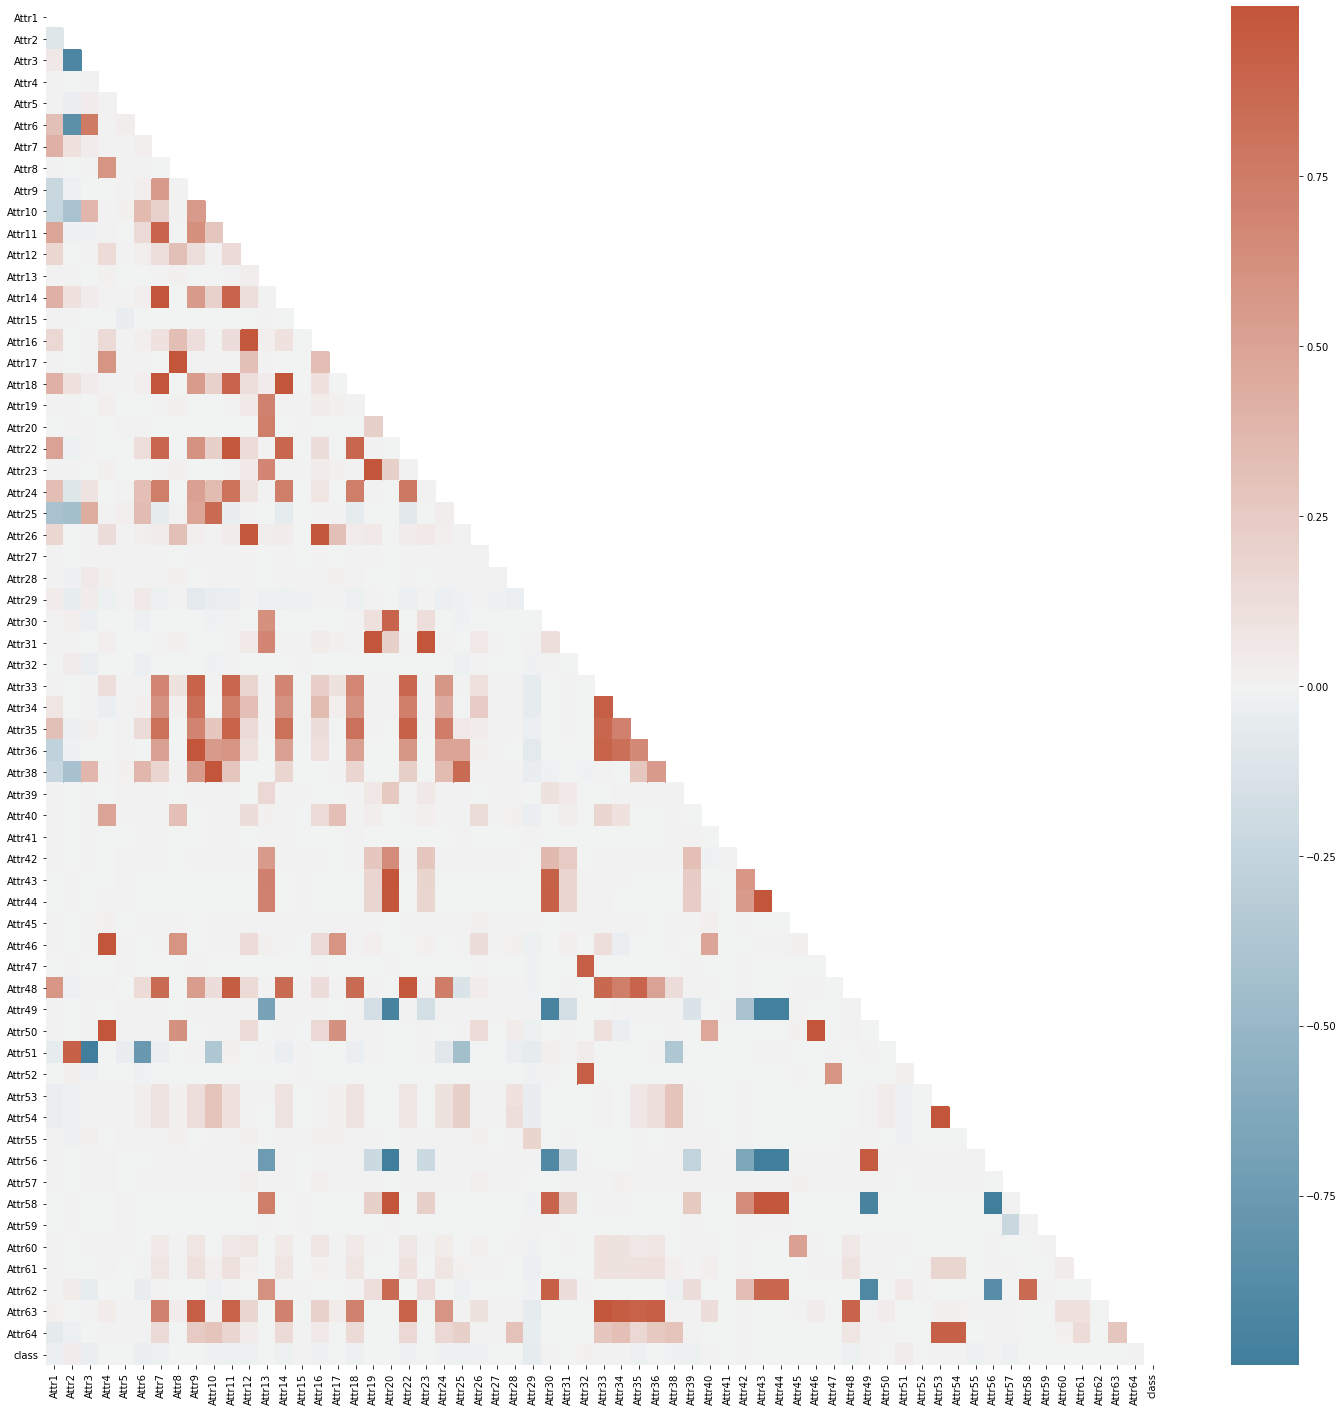

In [21]:
import seaborn as sns
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)

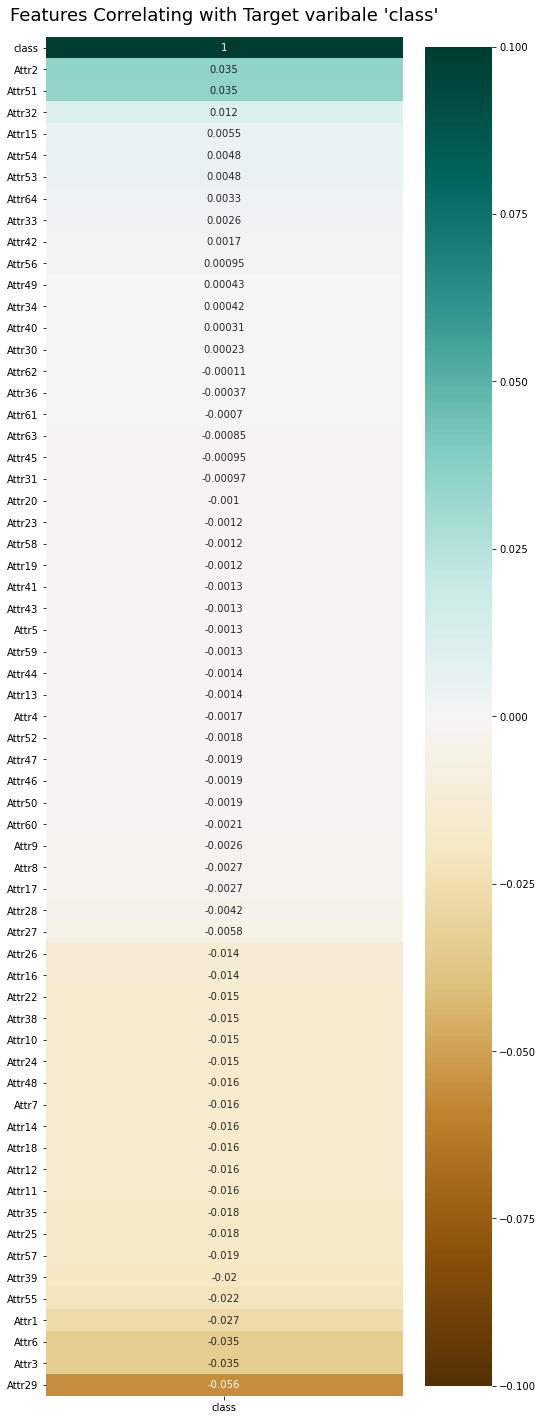

In [22]:
plt.figure(figsize=(8, 25))
heatmap = sns.heatmap(df.corr()[['class']].sort_values(by='class', ascending=False), vmin=-0.1, vmax=0.1, annot=True, cmap='BrBG')
heatmap.set_title("Features Correlating with Target varibale 'class'", fontdict={'fontsize':18}, pad=16);

# Modeling Preparations

In the case study, we will be using RandomForestClassifier and GradientBoostingClassifier from skelarn.ensemble package for predicting the bankruptcy of the companies.

First, we will do a 80-20 split on the dataset and then will be imputing the missing values.

In [23]:
X = df.loc[:, df.columns != 'class'].values
y = df['class'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
# Imputation
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)
cols = df.columns.values.tolist()
cols.remove('class')
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [25]:
print(X_train.shape)
print(X_test.shape)

(32553, 62)
(10852, 62)


# Model Building & Evaluation

For this step of preparing the model, we will follow below steps:
* Build a model with default parameters
* Evaluate the performance metrics 
* Build a model with GridSearchCV and choose best parameters
* Build a model using best parameters obtained from above step
* Evalaute the performance metrics

The above 5 steps will be performed for both RandomForestClassifier and GradientBoostingClassifier. We will be creating confusion matrix for train and test set for model built using default and best parameters obtained from GridSearchCV.


## Random Forest

### Random Forest with default parameters

In [26]:
rf_clf1 = RandomForestClassifier(random_state = 0)
rf_clf1.fit(X_train, y_train)

rf_clf1.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [27]:
y_hat_rf_train1 = rf_clf1.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_hat_rf_train1))
print("\n Classification Report \n",classification_report(y_train, y_hat_rf_train1, digits=6))

Confusion Matrix 
 [[31003     0]
 [    0  1550]]

 Classification Report 
               precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000     31003
           1   1.000000  1.000000  1.000000      1550

    accuracy                       1.000000     32553
   macro avg   1.000000  1.000000  1.000000     32553
weighted avg   1.000000  1.000000  1.000000     32553



<function matplotlib.pyplot.show(close=None, block=None)>

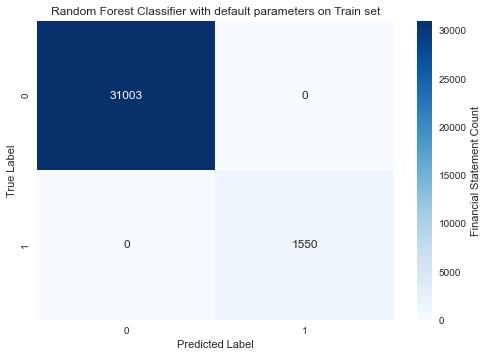

In [53]:
cm_rf_clf1_train = confusion_matrix(y_train, y_hat_rf_train1)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_rf_clf1_train, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('Random Forest Classifier with default parameters on Train set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show



In [29]:
y_hat_rf_test1 = rf_clf1.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_hat_rf_test1))
print("\n Classification Report \n",classification_report(y_test, y_hat_rf_test1, digits=6))

Confusion Matrix 
 [[10278    33]
 [  346   195]]

 Classification Report 
               precision    recall  f1-score   support

           0   0.967432  0.996800  0.981896     10311
           1   0.855263  0.360444  0.507152       541

    accuracy                       0.965076     10852
   macro avg   0.911348  0.678622  0.744524     10852
weighted avg   0.961840  0.965076  0.958229     10852



<function matplotlib.pyplot.show(close=None, block=None)>

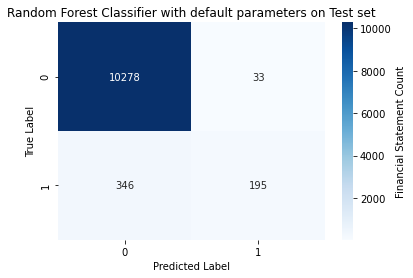

In [30]:
cm_rf_clf1_test = confusion_matrix(y_test, y_hat_rf_test1)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_rf_clf1_test, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('Random Forest Classifier with default parameters on Test set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

### Random Forest with GridSearchCV

In [31]:
tuned_parameters = {
    'n_estimators':[10,20,50,100],
    'max_depth':[5,10],
    'criterion':['gini','entropy'],
    'min_samples_split':[2,5,10,15]
    }
scores = ['accuracy']

In [32]:
%%time
rf_clf2 = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rf_clf2, param_grid=tuned_parameters, cv= 3,verbose=1)
CV_rfc.fit(X_train, y_train)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
CPU times: user 11min 13s, sys: 2.31 s, total: 11min 16s
Wall time: 11min 18s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [10, 20, 50, 100]},
             verbose=1)

In [33]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 15,
 'n_estimators': 10}

### Random Forest with best parameters of GridSearchCV

In [61]:
rf_clf3=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 10, 
                               max_depth=10, criterion='gini',
                              min_samples_split=4)
rf_clf3.fit(X_train, y_train)
y_hat_rf_train3 = rf_clf3.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_hat_rf_train3))
print("\n Classification Report \n",classification_report(y_train, y_hat_rf_train3, digits=6))

Confusion Matrix 
 [[31002     1]
 [  940   610]]

 Classification Report 
               precision    recall  f1-score   support

           0   0.970572  0.999968  0.985050     31003
           1   0.998363  0.393548  0.564553      1550

    accuracy                       0.971093     32553
   macro avg   0.984467  0.696758  0.774802     32553
weighted avg   0.971895  0.971093  0.965029     32553



<function matplotlib.pyplot.show(close=None, block=None)>

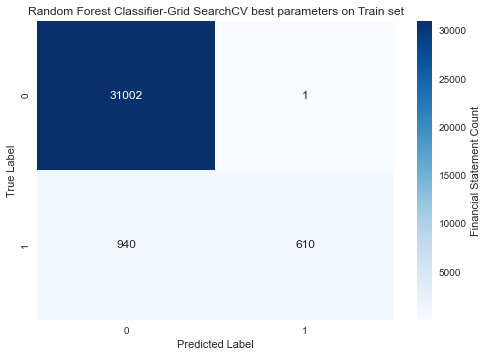

In [62]:
cm_rf_clf3_train = confusion_matrix(y_train, y_hat_rf_train3)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_rf_clf3_train, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('Random Forest Classifier-Grid SearchCV best parameters on Train set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

In [63]:
y_hat_rf_test3 = rf_clf3.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_hat_rf_test3))
print("\n Classification Report \n",classification_report(y_test, y_hat_rf_test3, digits=6))


Confusion Matrix 
 [[10303     8]
 [  384   157]]

 Classification Report 
               precision    recall  f1-score   support

           0   0.964068  0.999224  0.981332     10311
           1   0.951515  0.290203  0.444759       541

    accuracy                       0.963878     10852
   macro avg   0.957792  0.644714  0.713045     10852
weighted avg   0.963443  0.963878  0.954582     10852



<function matplotlib.pyplot.show(close=None, block=None)>

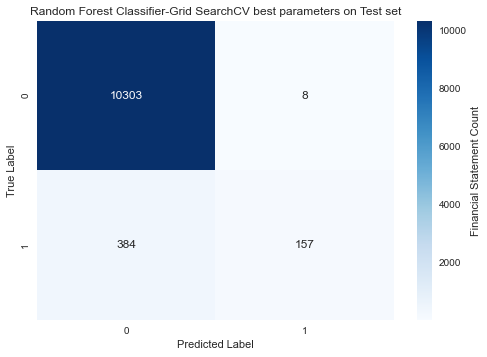

In [64]:
cm_rf_clf3_test = confusion_matrix(y_test, y_hat_rf_test3)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_rf_clf3_test, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('Random Forest Classifier-Grid SearchCV best parameters on Test set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

## XGBoost

### XGBoost with default parameters

In [38]:
xgb_clf1 = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
y_hat_xgb_train1 = xgb_clf1.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_hat_xgb_train1))
print("\n Classification Report \n",classification_report(y_train, y_hat_xgb_train1, digits=6))

Confusion Matrix 
 [[30996     7]
 [  860   690]]

 Classification Report 
               precision    recall  f1-score   support

           0   0.973004  0.999774  0.986207     31003
           1   0.989957  0.445161  0.614152      1550

    accuracy                       0.973367     32553
   macro avg   0.981480  0.722468  0.800180     32553
weighted avg   0.973811  0.973367  0.968492     32553



<function matplotlib.pyplot.show(close=None, block=None)>

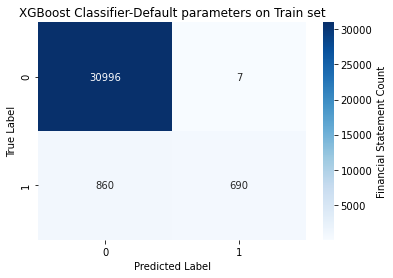

In [39]:
cm_xgb_clf1_train = confusion_matrix(y_train, y_hat_xgb_train1)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_xgb_clf1_train, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('XGBoost Classifier-Default parameters on Train set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

In [40]:
y_hat_xgb_test1 = xgb_clf1.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_hat_xgb_test1))
print("\n Classification Report \n",classification_report(y_test, y_hat_xgb_test1, digits=6))


Confusion Matrix 
 [[10294    17]
 [  320   221]]

 Classification Report 
               precision    recall  f1-score   support

           0   0.969851  0.998351  0.983895     10311
           1   0.928571  0.408503  0.567394       541

    accuracy                       0.968946     10852
   macro avg   0.949211  0.703427  0.775644     10852
weighted avg   0.967793  0.968946  0.963131     10852



<function matplotlib.pyplot.show(close=None, block=None)>

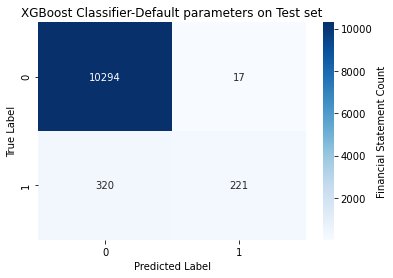

In [41]:
cm_xgb_clf1_test = confusion_matrix(y_test, y_hat_xgb_test1)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_xgb_clf1_test, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('XGBoost Classifier-Default parameters on Test set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

### XGBoost with GridSearchCV

In [42]:
parameters = {
    "learning_rate": [0.2,0.5,0.7],
    "min_samples_leaf": [0.1, 0.5],
    "max_depth":[3,8],
    "n_estimators":[10,30]
    }

xgb_clf2 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
xgb_clf2.fit(X_train, y_train)
xgb_clf2.best_params_

{'learning_rate': 0.5,
 'max_depth': 8,
 'min_samples_leaf': 0.1,
 'n_estimators': 30}

### XGBoost with best parameters of GridSearchCV

In [43]:
xgb_clf3 = GradientBoostingClassifier(n_estimators=30, min_samples_leaf=0.1, learning_rate=0.7, max_depth=8, random_state=0).fit(X_train, y_train)
y_hat_xgb_train3 = xgb_clf3.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_hat_xgb_train3))
print("\n Classification Report \n",classification_report(y_train, y_hat_xgb_train3, digits=6))

Confusion Matrix 
 [[30966    37]
 [  803   747]]

 Classification Report 
               precision    recall  f1-score   support

           0   0.974724  0.998807  0.986618     31003
           1   0.952806  0.481935  0.640103      1550

    accuracy                       0.974196     32553
   macro avg   0.963765  0.740371  0.813361     32553
weighted avg   0.973680  0.974196  0.970119     32553



<function matplotlib.pyplot.show(close=None, block=None)>

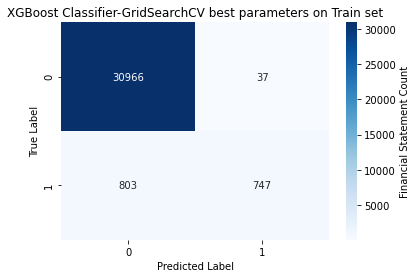

In [44]:
cm_xgb_clf3_train = confusion_matrix(y_train, y_hat_xgb_train3)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_xgb_clf3_train, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('XGBoost Classifier-GridSearchCV best parameters on Train set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

In [45]:
y_hat_xgb_test3 = xgb_clf3.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_hat_xgb_test3))
print("\n Classification Report \n",classification_report(y_test, y_hat_xgb_test3, digits=6))

Confusion Matrix 
 [[10291    20]
 [  314   227]]

 Classification Report 
               precision    recall  f1-score   support

           0   0.970391  0.998060  0.984031     10311
           1   0.919028  0.419593  0.576142       541

    accuracy                       0.969222     10852
   macro avg   0.944710  0.708827  0.780087     10852
weighted avg   0.967831  0.969222  0.963697     10852



<function matplotlib.pyplot.show(close=None, block=None)>

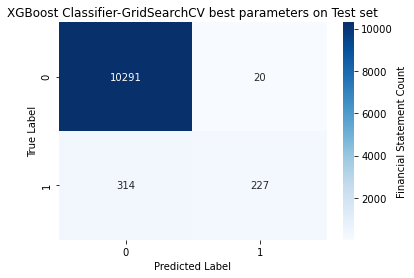

In [46]:
cm_xgb_clf3_test = confusion_matrix(y_test, y_hat_xgb_test3)
ax = plt.axes()
x_axis_labels = ['0', '1']
y_axis_labels = ['0', '1']
sns.heatmap(cm_xgb_clf3_test, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Financial Statement Count',})
ax.set_title('XGBoost Classifier-GridSearchCV best parameters on Test set')
plt.xlabel("Predicted Label")
plt.ylabel("True Label") 
plt.show

# Model Interpretability & Explanability

### Feature Importance for Random Forest with best parameters

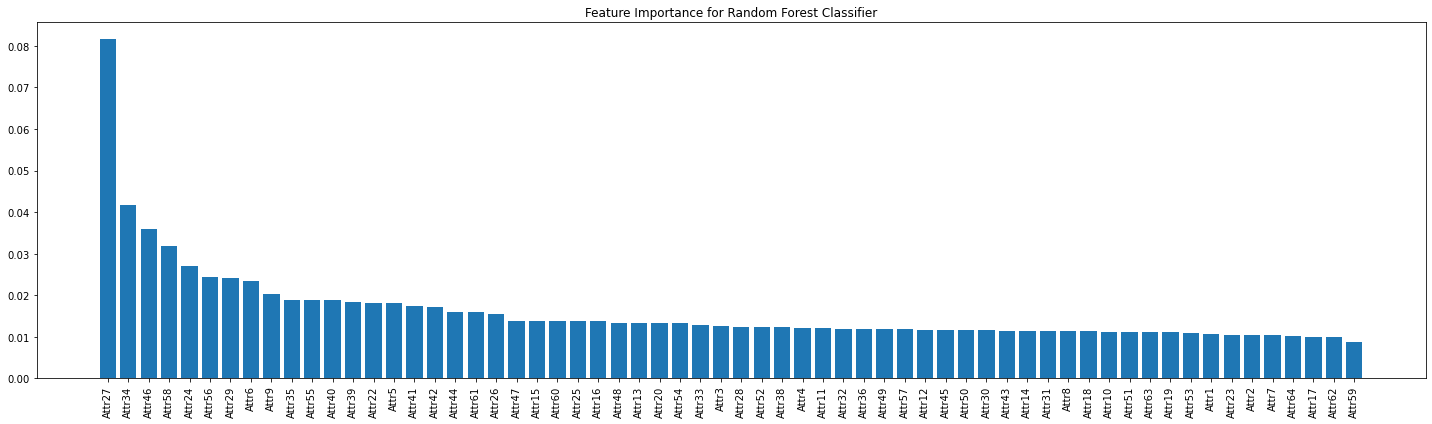

In [47]:
feature_importances = rf_clf1.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(20,6))
plt.title('Feature Importance for Random Forest Classifier')
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


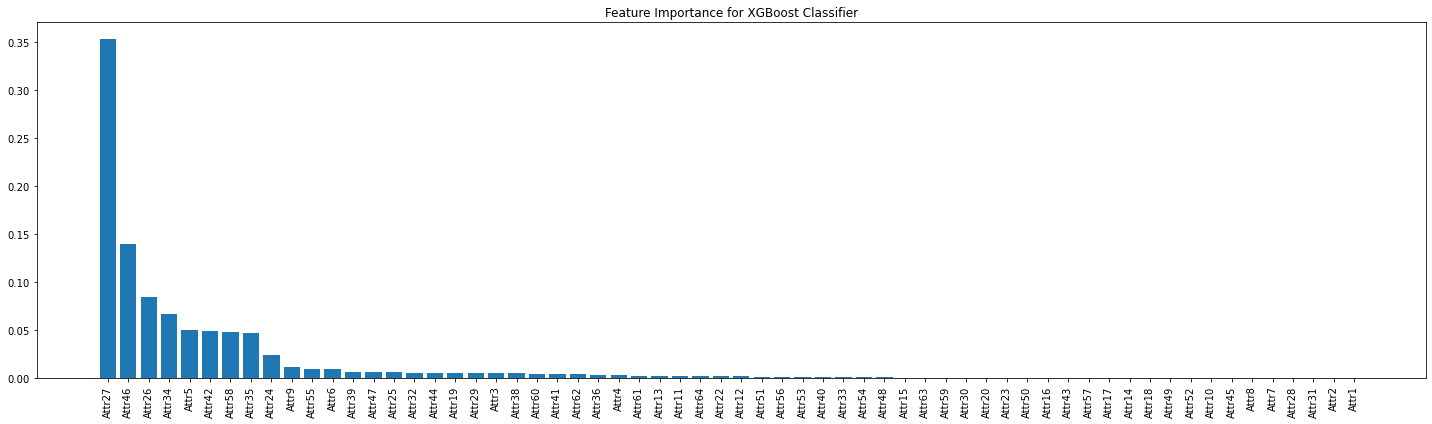

In [48]:
feature_importances = xgb_clf3.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(20,6))
plt.title('Feature Importance for XGBoost Classifier')
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


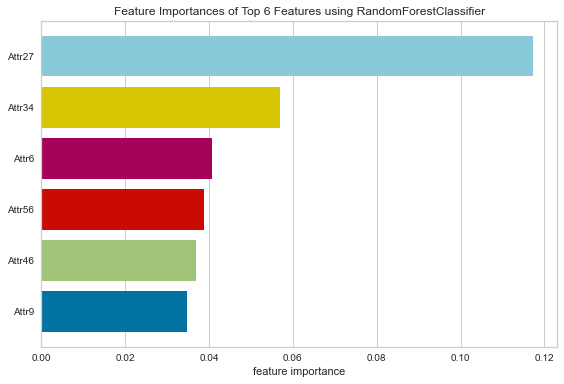

<AxesSubplot:title={'center':'Feature Importances of Top 6 Features using RandomForestClassifier'}, xlabel='feature importance'>

In [49]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(rf_clf3,topn=6,relative=False)
viz.fit(X_test, y_test)
viz.show()

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


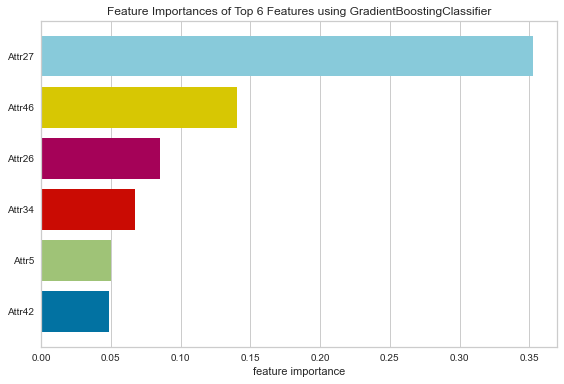

<AxesSubplot:title={'center':'Feature Importances of Top 6 Features using GradientBoostingClassifier'}, xlabel='feature importance'>

In [66]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(xgb_clf3,topn=6,relative=False)
viz.fit(X_test, y_test)
viz.show()

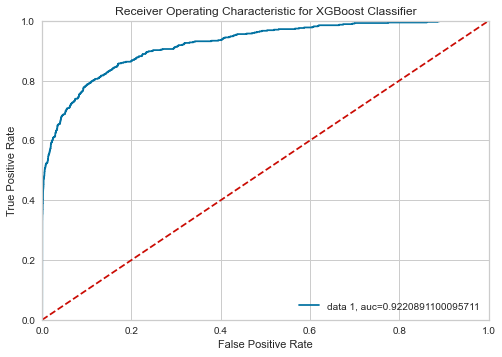

In [51]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred_proba = xgb_clf3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for XGBoost Classifier')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



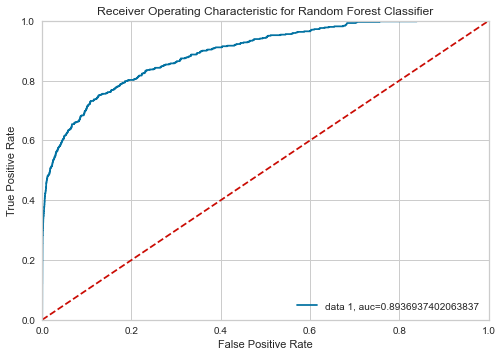

In [52]:
# calculate the fpr and tpr for all thresholds of the classification
y_pred_proba = rf_clf3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Case Conclusions